In [1]:
import os
import sys
import fitsio
import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt
import astropy.io.fits   as fits

In [2]:
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
import pubplot

from schechter     import schechter, named_schechter
from gama_limits   import gama_field
from delta8_limits import d8_limits, delta8_tier
from findfile      import findfile, fetch_fields
from lumfn         import multifield_lumfn
from astropy.table import Table

In [4]:
version = 'GAMA4'
survey  = 'gama'
field   = 'G12'
dryrun  = False

In [5]:
fields  = fetch_fields(survey)

In [6]:
# TODO: clean up root below in LF cells
root    = '{}/data/GAMA4/'.format(os.environ['HOME'])
fpath   =  findfile(ftype='ddp_n8', version=version, dryrun=dryrun, survey=survey)
fpath

'/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_ddp_n8.fits'

In [7]:
fpath   = findfile(ftype='randoms_bd_ddp_n8', field=field, version=version, dryrun=dryrun, survey=survey)
randoms = Table.read(fpath)

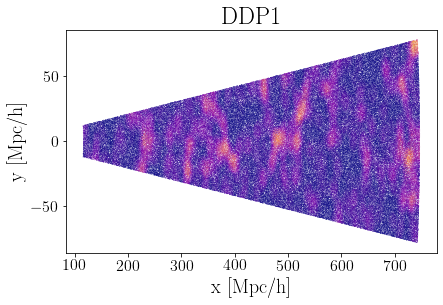

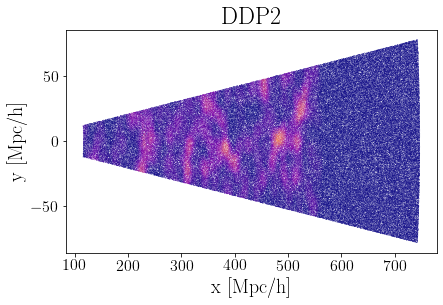

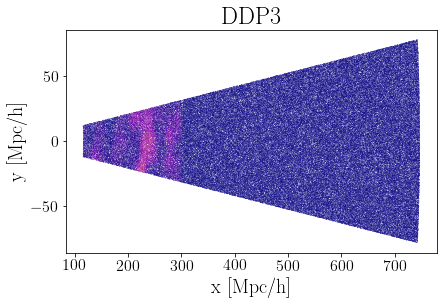

In [8]:
randoms_slice = randoms[np.abs(randoms['ROTCARTESIAN_Z']) < 5.]

for idx in np.arange(1, 4, 1):
    plt.scatter(randoms_slice['ROTCARTESIAN_X'],\
                randoms_slice['ROTCARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=-1.,\
                vmax=10.,\
                cmap='plasma')

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')
    
    plt.title('DDP{}'.format(idx))
    plt.show()

/tmp/ipykernel_174499/1454911877.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i], markersize=6)
/tmp/ipykernel_174499/1454911877.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i], markersize=6)
/tmp/ipykernel_174499/1454911877.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i], markersize=6)
/tmp/ipykernel_174499/1454911877.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i], markersize=6)
/tmp/ipykernel_174499/1454911877.py:17: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i], mark

Text(0.5, 1.0, 'G9/12/15')

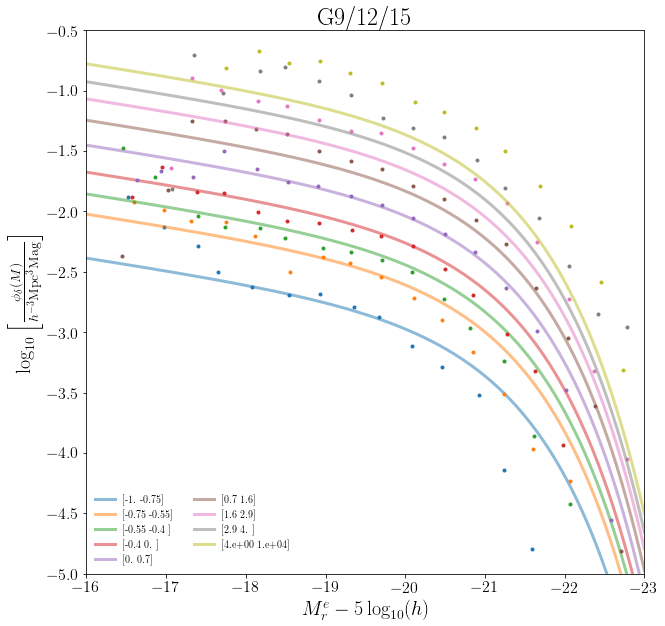

In [9]:
colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax   = plt.subplots(1, 1, figsize=(10,10))

for i in np.arange(0, 9, 1):
    lfs   = [findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i)]
    lf    = multifield_lumfn(lfs, ext='LUMFN')

    ddp   = Table.read(findfile(ftype='ddp_n8_d0', survey=survey, field=field, version=version, utier=i))

    refs  = [findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i)]
    ref   = multifield_lumfn(refs, ext='REFERENCE')

    label = ddp.meta['D8{}LIMS'.format(i)]

    ax.plot(ref['MS'], np.log10(ref['REFSCHECHTER'.format(i)]), label=label, alpha=0.5, c=colors[i])
    ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', marker='.', lw=0.0, c=colors[i], markersize=6)
    
ax.set_xlabel(r'$M_r^e - 5 \log_{10}(h)$')
ax.set_ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')

ax.set_xlim(-16., -23.0)
ax.set_ylim(-5, -0.5)

ax.legend(frameon=False, loc=3, ncol=2, fontsize=10)
ax.set_title('G9/12/15')

/tmp/ipykernel_174499/4014309023.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', lw=2.0, c=colors[i])
/tmp/ipykernel_174499/4014309023.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', lw=2.0, c=colors[i])
/tmp/ipykernel_174499/4014309023.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', lw=2.0, c=colors[i])
/tmp/ipykernel_174499/4014309023.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', lw=2.0, c=colors[i])
/tmp/ipykernel_174499/4014309023.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', lw=2.0, c=colors[i])
/tmp/ipykernel_174499/4014309023.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np

Text(0.5, 1.0, 'G9/12/15')

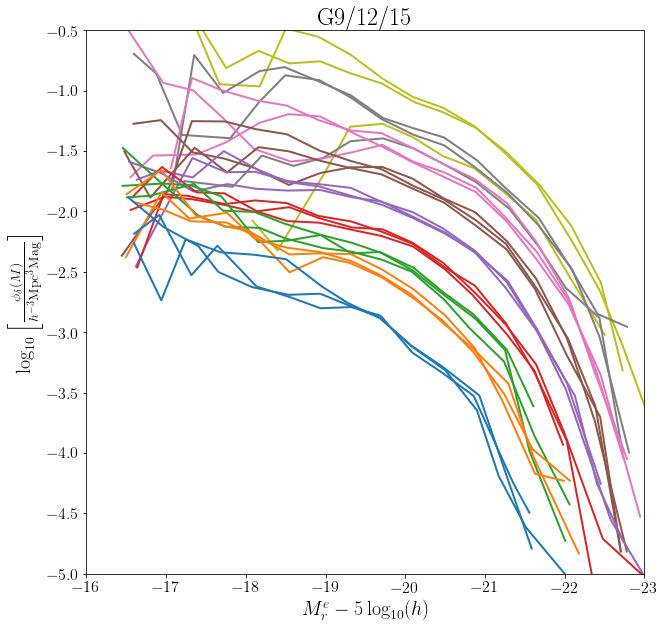

In [10]:
colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax   = plt.subplots(1, 1, figsize=(10,10))

for i in np.arange(0, 9, 1)[::-1]:
    for field in fields:
        lf  = Table.read(findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i), 'LUMFN')
        ddp = Table.read(findfile(ftype='ddp_n8_d0', survey=survey, field=field, version=version, utier=i), 'DDP')

        ref = Table.read(findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i), 'REFERENCE')

        label = ddp.meta['D8{}LIMS'.format(i)]

        # ax.plot(ref['MS'], np.log10(ref['REFSCHECHTER'.format(i)]), label=label, alpha=0.5, c=colors[i])
        ax.plot(lf['MEDIAN_M'], np.log10(lf['PHI_IVMAX']), label='', lw=2.0, c=colors[i])
    
ax.set_xlabel(r'$M_r^e - 5 \log_{10}(h)$')
ax.set_ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')

ax.set_xlim(-16., -23.0)
ax.set_ylim(-5, -0.5)

ax.legend(frameon=False, loc=3, ncol=2, fontsize=10)
ax.set_title('G9/12/15')

/tmp/ipykernel_174499/4077493909.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_174499/4077493909.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_174499/4077493909.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_174499/4077493909.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_174499/4077493909.py:16: RuntimeWarning: divide by zero encountered in log10
  ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
/tmp/ipykernel_174499/4077493909.py

Text(0.5, 1.0, 'G9/12/15')

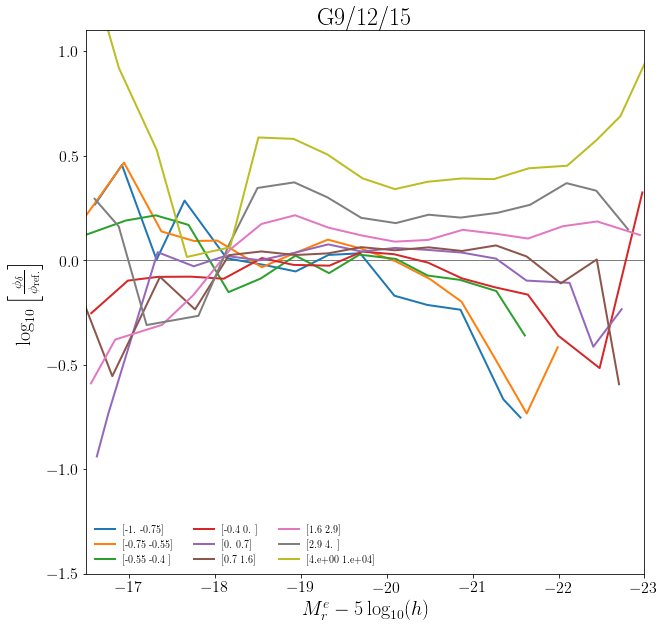

In [16]:
colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax   = plt.subplots(1, 1, figsize=(10,10))

ax.axhline(0.0, lw=0.5, c='k')

for i in np.arange(0, 9, 1):
    lfs   = [findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i)]
    lf    = multifield_lumfn(lfs, ext='LUMFN')

    ddp   = Table.read(findfile(ftype='ddp_n8_d0', survey=survey, field=field, version=version, utier=i))
    ref   = Table.read(findfile(ftype='ddp_n8_d0_lumfn', survey=survey, field=field, version=version, utier=i), 'REFERENCE')

    label = ddp.meta['D8{}LIMS'.format(i)]

    ax.plot(lf['MEDIAN_M'], np.log10(lf['REF_RATIO']), label=label, lw=2.0, c=colors[i], markersize=4)
    
ax.set_xlabel(r'$M_r^e - 5 \log_{10}(h)$')
ax.set_ylabel(r'$\log_{10} \left[ \frac{\phi_\delta}{\phi_{\rm ref.}} \right] $')

ax.set_xlim(-16.5, -23.0)
ax.set_ylim(-1.5,    1.1)

ax.legend(frameon=False, loc=3, ncol=3, fontsize=10)
ax.set_title('G9/12/15')

In [29]:
os.environ['GOLD_DIR'] = '/cosma5/data/durham/dc-wils7/GAMA4/'

gold = Table.read(findfile(ftype='gold'))
gold

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,JK
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,bytes4
79517,587722983369015586,221.90442937,0.19181593,19.589008,0.14767,4,G15_Y5_004_309,5,21.616375,20.058775,19.546654,19.20639,19.090242,0.14767,493.46971211371834,38.46630250979477,G15,0,0,-320.0115524901314,-287.17460304287704,1.4394768642038602,322.4137148457745,284.47648238969197,1.1161989767273883,0.5121212,19.589008,JK8
423202,587728879794782493,134.32965481,2.82326431,19.222818,0.19018,4,G09_Y1_DX2_241,6,21.372406,20.112215,19.258823,18.882227,18.598429,0.19018,653.2280894262998,39.075324257700316,G9,0,0,-383.0616535447091,392.1316199246054,27.03368964713638,379.7812811157212,-395.3353758568989,26.652903166931036,0.85339165,19.222818,JK1
618528,588848900465295688,215.97888844,0.21146994,19.322342,0.16661,4,G15_Y3_005_314,6,22.302507,20.306444,19.239223,18.774178,18.491404,0.16661,563.7250516414288,38.75533667532398,G15,0,0,-391.0322205795908,-283.8814590125174,1.7834735092634075,393.4045254093146,280.5869047306039,1.3890145465743724,1.0672207,19.322342,JK7
373141,587727942955630981,139.53849015,1.26850634,19.737514,0.22611,4,G09_Y3_014_239,5,21.303547,20.244375,19.748362,19.455616,19.24166,0.22611,793.9706172982571,39.499022153310875,G9,0,0,-492.56446888872307,420.11785987044976,14.335390665026965,489.0323711249148,-424.2404154497467,13.845053638238964,0.49601364,19.737514,JK2
41220,587722982278955568,184.63971854,-0.69652957,19.718143,0.08393,4,G12_Y1_ND7_140,5,21.04846,20.039017,19.660496,19.375326,19.384188,0.08393,268.3426613039717,37.14344861300682,G12,0,0,-246.73507218300853,-20.023990929771518,-3.009502502081882,246.89142103749109,17.95079263419047,-3.257057738613331,0.37852097,19.718143,JK5
273124,587726031175745783,182.18343912,1.38318181,18.728197,0.25301,4,G12_Y1_EX2_010,6,20.82814,19.595024,18.477016,18.070349,17.733896,0.25301,902.642312609461,39.777578439085346,G12,0,0,-719.6463876706407,-27.437712954604105,17.389039367761065,719.8685415343215,21.391956603583516,16.667248472208893,1.1180077,18.728197,JK5
367321,587726033877205694,221.34957849,2.86496938,19.153774,0.22161,4,G15_Y4_230_359,6,21.16949,20.083027,19.089508,18.630032,18.36162,0.22161,776.0641832900482,39.44948820227037,G15,0,0,-476.3038987332113,-419.17400164285385,31.75275682703238,479.8396135972334,415.1584210260319,31.271645973422384,0.9935188,19.153774,JK8
278559,587726031690858703,132.39561337,0.84647721,16.67593,0.06538,5,525839268854130688,6,18.920893,17.333975,16.626013,16.218363,15.91453,0.06538,206.21224741843818,36.57157227729542,G9,0,0,-130.49107494720033,142.92793609466335,2.8594780285823997,129.28872691612673,-144.01897519551804,2.7298439134762837,0.70796204,16.67593,JK0


In [30]:
np.unique(gold['FIELD'])

G12
G15
G9


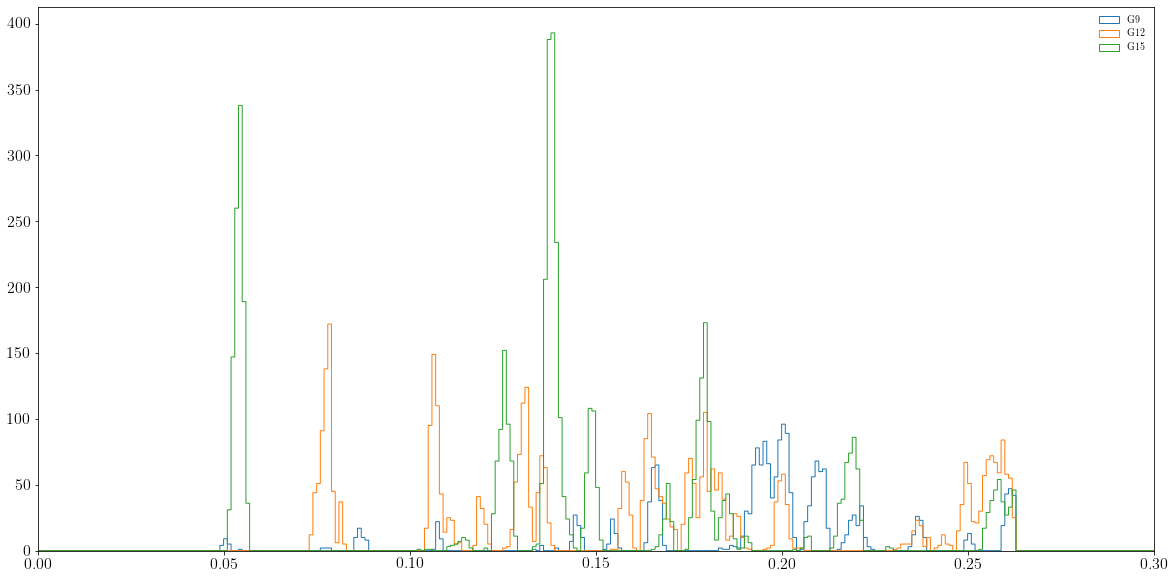

In [43]:
fig, ax = plt.subplots(1,1,figsize=(20, 10))

pl.sca(ax)

for field in ['G9', 'G12', 'G15']:
    gold = Table.read(findfile(ftype='ddp_n8_d0', dryrun=False, field=field, utier=8))
    
    # isin = gold['FIELD'] == field

    # print(field, np.mean(isin))
    
    pl.hist(gold['ZSURV'], bins=np.arange(0.0, 1.0, 1.e-3), histtype='step', label=field)
        
pl.xlim(0.0, 0.3)
pl.legend(frameon=False)

# Done.